In [1318]:
# polynomial regression using gradient descent with matrices and regularization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/6_deg_reg.xlsx')

x_train = data['x'].values
y_train = data['y'].values

In [1319]:
# set the degree of the polynomial
degree = 6

In [1320]:
# create input matrix
X = np.ones((len(x_train), degree + 1))
for i in range(1, degree + 1):
    X[:, i] = x_train ** i

X.shape

(36, 7)

In [1321]:
# scale the input matrix
X = X / np.max(X)

In [1322]:
# create vector of answers
y = y_train.reshape(-1, 1)

In [1323]:
theta = np.zeros((X.shape[1], 1))
a = 1
m = len(x_train)
iterations = range(100000)
lambda_ = 0.1
mse_list = []

for _ in iterations:
    # X @ theta are the predictions of y
    # (X @ theta - y) are the errors
    # X.T @ (X @ theta - y) sums the errors for each theta
    # (a / m) is learning rate (slow down the process)
    # lambda_*np.sum(theta[1:]) is the regularization term
    
    theta = theta - (a/m) * X.T @ ( (X@theta-y) + lambda_*np.sum(theta[1:]) )

    # mean squared error
    mse_total = np.sum((X @ theta - y) ** 2)
    mse_list.append(mse_total)

theta.T

array([[ 51.16172041,  30.31809436,  12.16517679,  -5.53054005,
        -20.62688343, -23.94367996,  15.55008978]])

In [1324]:
# print equation
print('y = %.2f' % theta[0], end='')
for i in range(1, len(theta)):
    print(' + %.2fx^%d' % (theta[i], i), end='')

print('\n')

theta_scl = theta / np.max(theta)
print('y = %.2f' % theta_scl[0], end='')
for i in range(1, len(theta_scl)):
    print(' + %.2fx^%d' % (theta_scl[i], i), end='')

y = 51.16 + 30.32x^1 + 12.17x^2 + -5.53x^3 + -20.63x^4 + -23.94x^5 + 15.55x^6

y = 1.00 + 0.59x^1 + 0.24x^2 + -0.11x^3 + -0.40x^4 + -0.47x^5 + 0.30x^6

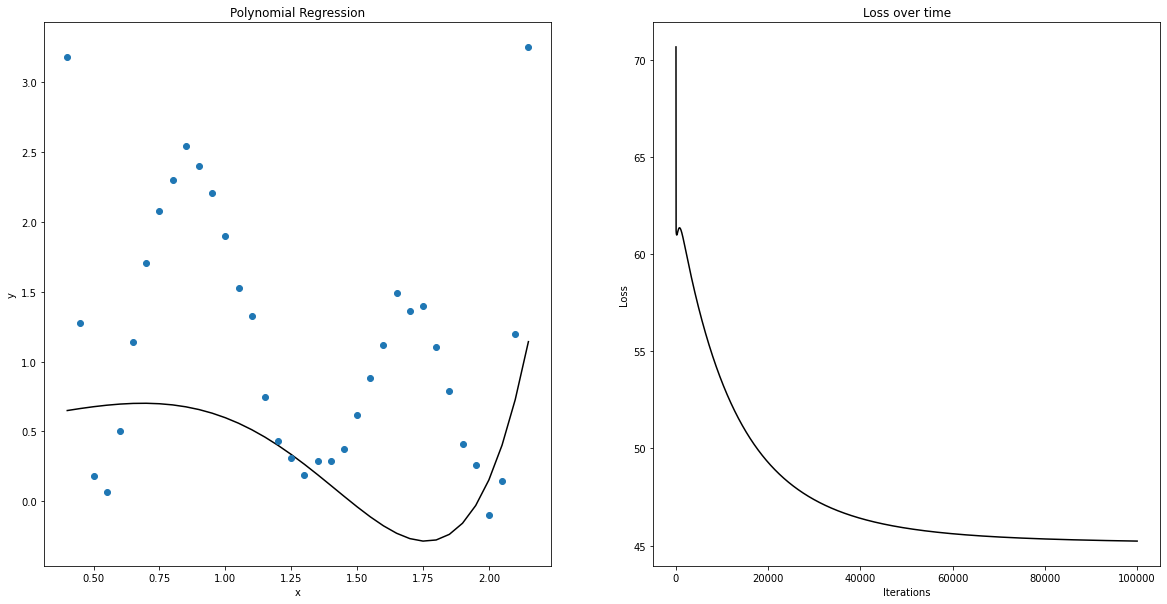

In [1325]:
# plot results
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.set_title('Polynomial Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

y_pred = X @ theta
plt.plot(x_train, y_pred, 'k-')
plt.plot(x_train, y_train, 'o')

# plot how the loss decreases over time
ax2 = fig.add_subplot(122)
ax2.set_title('Loss over time')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.plot(iterations, mse_list, 'k-')

plt.show()